# Building a Model for Predicting Heart Failure

This is an exercise that I do to practice building predictive machine learning (ML) models. I picked this dataset specifically because I wanted to study classification algorithms. Classification algorithms are used in many different fields, such as drug discovery and assessing toxicity of molecules. It would be better to use public EPA data, but I wanted to start practicing with a dataset that I can understand. With that, my goal is to find a dataset that is similar to EPA dataset in terms of data types.

## Part 1: Finding a dataset on kaggle.com

I used kaggle.com API to find a publicly available dataset. I believe the 'heart failure' dataset is a suitable one since the data is similar to EPA datasets that I have looked at. You have to download "kaggle" package first. If you are using conda, use one of the commands below:

- conda install -c conda-forge kaggle 
- conda install -c conda-forge/label/cf202003 kaggle

If you are using "pip" to install packages, try:

- pip install kaggle

Once, you install "kaggle" package, you can run searches on Kaggle inside Python.

In [90]:
# Import "kaggle" library to search for datasets and kernels on kaggle.com

import kaggle

In [2]:
# Search datasets with keyword 'heart'. Make sure you start with '!'

!kaggle datasets list -s 'heart'

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
andrewmvd/heart-failure-clinical-data                         Heart Failure Prediction                          4KB  2020-06-20 01:03:20          73308       1551  1.0              
ronitf/heart-disease-uci                                      Heart Disease UCI                                 3KB  2018-06-25 11:33:56         272423       5574  0.7647059        
fedesoriano/heart-failure-prediction                          Heart Failure Prediction Dataset                  9KB  2021-09-10 18:11:57          46043       1526  1.0              
rashikrahmanpritom/heart-attack-analysis-prediction-dataset   Heart Attack Analysis & Pred

In [3]:
# To download the 'heart-failure-prediction' dataset, we provide the path and download it as .zip file.
# Once downloaded, unzip the .csv file into the folder. If you already have a local copy of the dataset, 
# Python will skip the download.

!kaggle datasets download -d 'fedesoriano/heart-failure-prediction'

heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# LIBRARIES

import kaggle

!kaggle datasets list -s 'heart'

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
andrewmvd/heart-failure-clinical-data                         Heart Failure Prediction                          4KB  2020-06-20 01:03:20          73308       1551  1.0              
ronitf/heart-disease-uci                                      Heart Disease UCI                                 3KB  2018-06-25 11:33:56         272423       5574  0.7647059        
fedesoriano/heart-failure-prediction                          Heart Failure Prediction Dataset                  9KB  2021-09-10 18:11:57          46044       1526  1.0              
rashikrahmanpritom/heart-attack-analysis-prediction-dataset   Heart Attack Analysis & Pred

## Part 2: Project Planning

Below are the steps that I plan to take to build a ML model to predict heart failure:

1. Data Exploration
    - data types,
    - null values,
    - descriptive statistics of numeric values,
    - correlation between different numeric attributes
    - explore interesting questions
        * Is one sex more prone to heart failure than the other?
        * Do people at a certain age range are more likely to have heart failure?
        * Is one chest pain more indicative of a heart failure than others?
        * ...

2. Feature Engineering
    - Make some new variables if necessary
    
3. Preprocess the data

4. Model building
    - Scale the data if necessary
    - Assumptions

5. Model Baseline

6. Model Comparison
   
    


## Part 3: Import the dataset and explore the data

The dataset has some attributes that I don't know what they mean. So, I went to kaggle.com, searched the dataset, and read the description of the dataset.

- https://www.kaggle.com/fedesoriano/heart-failure-prediction


In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')

df_copy = df #taking a copy of the dataset just in case.

In [2]:
# To see the attributes in the dataset, uncomment df.columns and comment df.head().
# To take a peak at the dataset, comment df.columns and uncomment df.head()

# df.columns
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Let's look at data types and missing values. Looks like there are 5 categorical variables. In addition, there are no missing values. I guess we are lucky.

In [3]:
# data types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# descriptive statistics

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


There is something interesting that caught my eye. The minimum resting blood pressure in the dataset is $0$. I am not a doctor, but this probably means the subject is dead. Similarly, minimum 'cholesterol' and 'FastingBS' are $0$. I read the description of the data. For 'FastingBs', it is $1$ if fasting blood sugar is greater than $120$ mg/dl and $0$ otherwise. So, 'FastingBS' is a categorical variable. However, there is no explanation for 'RestingBP' and 'cholesterol'. Therefore, I'll treat $0$ 'RestingBP' and 'cholesterol' as missing values and replace zeros with NaNs.

In [5]:
import numpy as np

df.loc[df["Cholesterol"] == 0.0, "Cholesterol"] = np.NAN
df.loc[df["RestingBP"] == 0.0, "RestingBP"] = np.NAN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


There is only one NaN in the RestingBP feature. So, I'll just drop that row from the entire dataset.

In [7]:
# find the row with zero RestingBP

df.RestingBP[df.RestingBP.isnull()]

449   NaN
Name: RestingBP, dtype: float64

In [8]:
# drop the row with zero RestingBP

df.drop([449],axis=0,inplace=True)
df.shape

(917, 12)

In [9]:
# reset the index of the dataset after dropping a row
df.reset_index(drop=True)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
913,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
914,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
915,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


Let's visually inspect how many missing values we have in the data. For that, I'll use the nullity matrix. Visualizing missing values can provide an aspect that missing value numbers can't. For example, when I look at this data I see that the missing values concentrated in the first half of the dataset, especially in the 2nd quarter of the data. This made think that the missing values is potentially coming from one source. Because remember that the dataset we are working on is a combination of a few other datasets. 

<AxesSubplot:>

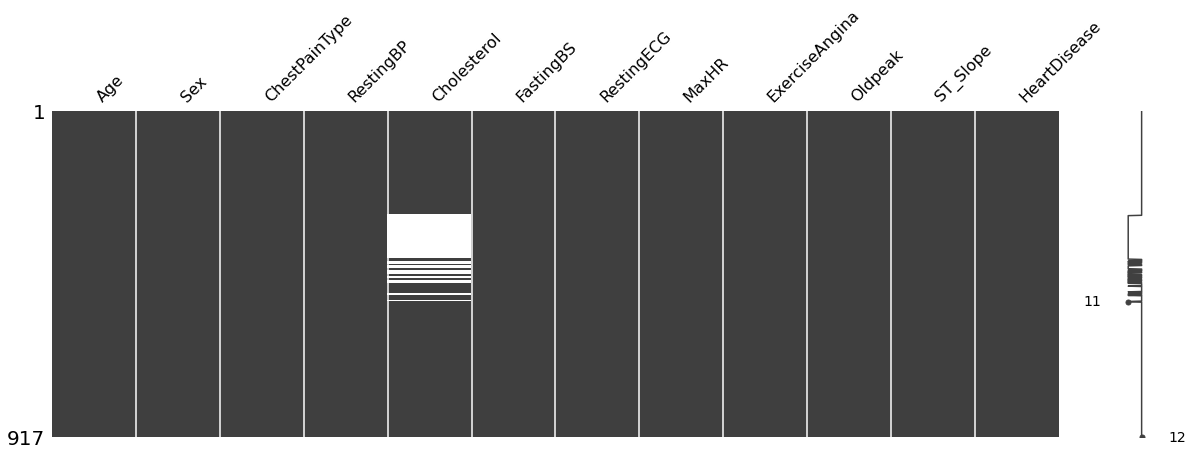

In [10]:
import missingno as mno

mno.matrix(df, figsize=(20,6))

Now, I'll plot histrograms for numeric variables and barplots for categorical variables. Then, I'll take some notes about what I see in charts.

In [11]:
# Separate the numeric and categorical variables since we drop a row from the dataset

df_num = df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]
df_cat = df[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']]

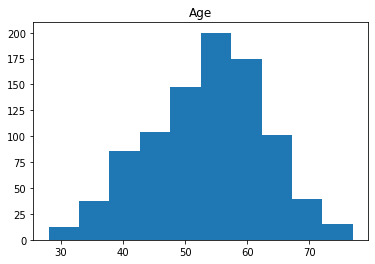

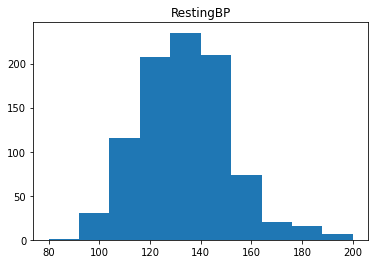

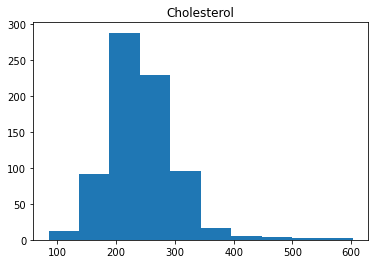

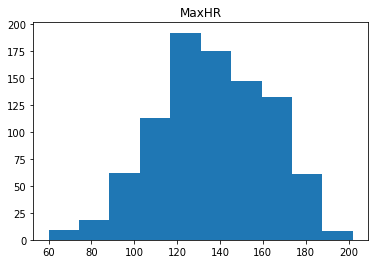

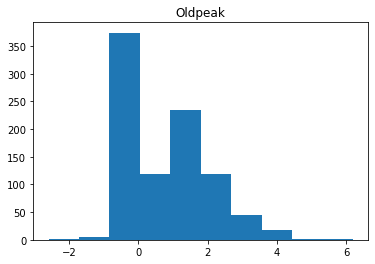

In [12]:
import matplotlib.pyplot as plt

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Non of the numeric features seems to be extremely skewed except, maybe, the Oldpeak. I see that Cholesterol feature have some outliers and we can deal with it later. Finally, I'll make a pivot table to quickly look at the averages of numeric attributes for people with heart disease and no heart disease.

In [13]:
# create a pivot table for numeric attributes

pd.pivot_table(df, index = 'HeartDisease', values = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak'])

,Age,Cholesterol,MaxHR,Oldpeak,RestingBP
HeartDisease,,,,,
0,50.551220,238.769231,148.151220,0.408049,130.180488
1,55.901381,251.061798,127.601578,1.273767,134.449704


First thoughts about what numeric features indicate:

1. Average age for heart disease is around 56.
2. Although we haven't imputed Cholesterol yet, subjects with heart disease seem to have a relatively higher average cholesterol.
3. Healthy individuals have a higher average maximum heart rate than subjects with heart disease.
4. Average Oldpeak is greater in subjects with heart disease.
5. Resting blood pressure of unhealthy individuals is higher.

I'll look at the correlation between numeric features before I start exploring categorical variables.

In [14]:
# run Spearman's Rank-Order Correlation test on numeric values
from scipy import stats
stats.spearmanr(df_num)

SpearmanrResult(correlation=array([[ 1.        ,  0.28010827,         nan, -0.36528433,  0.29830062],
       [ 0.28010827,  1.        ,         nan, -0.10620458,  0.17721514],
       [        nan,         nan,         nan,         nan,         nan],
       [-0.36528433, -0.10620458,         nan,  1.        , -0.2058892 ],
       [ 0.29830062,  0.17721514,         nan, -0.2058892 ,  1.        ]]), pvalue=array([[0.00000000e+00, 5.41368637e-18, 1.39307068e-06, 2.51200700e-30,
        2.66099782e-20],
       [5.41368637e-18, 0.00000000e+00, 4.23031587e-01, 1.27826941e-03,
        6.59307351e-08],
       [1.39307068e-06, 4.23031587e-01, 0.00000000e+00, 3.83385171e-09,
        9.30871629e-02],
       [2.51200700e-30, 1.27826941e-03, 3.83385171e-09, 0.00000000e+00,
        3.09820562e-10],
       [2.66099782e-20, 6.59307351e-08, 9.30871629e-02, 3.09820562e-10,
        0.00000000e+00]]))

<AxesSubplot:>

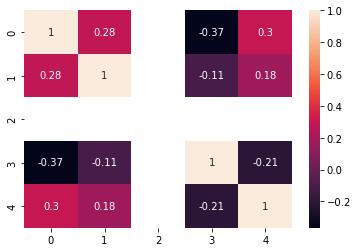

In [15]:
# Visualize correlation between values as a heatmap

import seaborn as sns

sns.heatmap(stats.spearmanr(df_num)[0], annot=True)

First of all, we don't have any information about the correlation between cholesterol and other numeric features because cholesterol feature has NaNs. With that, majority of the correlations are statistically significant. However, test results indicate that there isn't moderate or strong correlation between any pairs. 

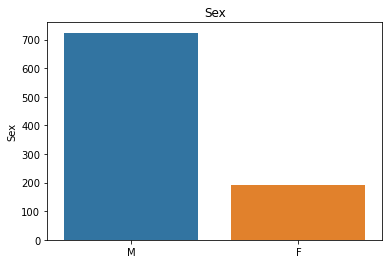

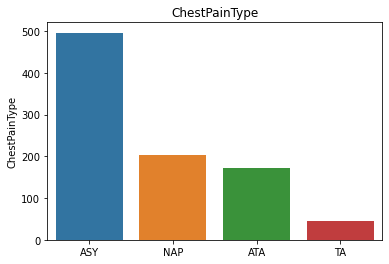

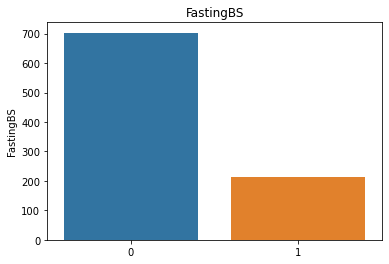

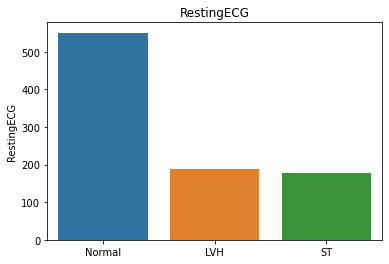

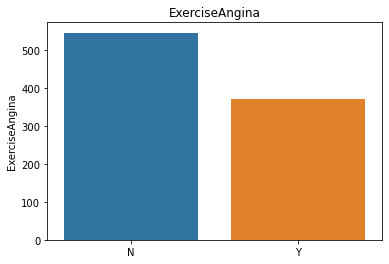

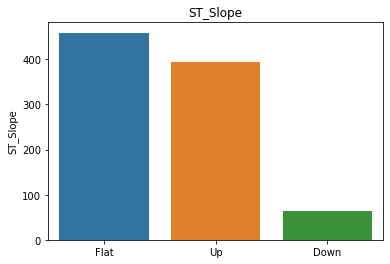

In [16]:
import seaborn as sns

for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts()).set_title(i)
    plt.show()

Here are my notes for barplots above:

1. The number of male subjects participated in the study are $3$ times more than the female subjects.
2. Out of $4$ chestpain types, 'ASY' is the most abundant. ASY is short for 'asymptomatic'. I guess it refers to no-chest pain. 'NAP' is the second most abundant category. It means non-anginal pain. This means the chest pain is not due to a heart condition but because of a muscle problem or something else. The other two, 'ATA' and 'TA' are actually heart pains and they are the two least abundant chest pain types in the dataset.
3. Most subjects have a resting blood sugar (RestingBS) less than $120$ mg/dl.
4. Majority of the subjects don't have an exercise-induced angina (heart pain). However, the number of patients with ExerciseAngina is more than half of the no-ExerciseAngina group.
5. I don't know what ST_Slope means. So, I'll just describe what I quantitatively see. The number of 'Flat' and 'Up' are close to each other and significantly more than 'Down'.

Now, let's look at pivot tables for categorical variables. Because barplots doesn't tell us anything about the distribution of heart disease in categories.

In [17]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(df, index = 'HeartDisease', columns = 'Sex', values = 'Age' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'HeartDisease', columns = 'ChestPainType', values = 'Age' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'HeartDisease', columns = 'FastingBS', values = 'Age' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'HeartDisease', columns = 'RestingECG', values = 'Age' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'HeartDisease', columns = 'ExerciseAngina', values = 'Age' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'HeartDisease', columns = 'ST_Slope', values = 'Age' ,aggfunc ='count'))

Sex             F    M
HeartDisease          
0             143  267
1              50  457

ChestPainType  ASY  ATA  NAP  TA
HeartDisease                    
0              104  149  131  26
1              392   24   71  20

FastingBS       0    1
HeartDisease          
0             366   44
1             337  170

RestingECG    LVH  Normal   ST
HeartDisease                  
0              82     267   61
1             106     284  117

ExerciseAngina    N    Y
HeartDisease            
0               355   55
1               191  316

ST_Slope      Down  Flat   Up
HeartDisease                 
0               14    79  317
1               49   380   78


Here are my notes:

1. Majority of the female subjects have no heart disease, while two-thirds of male subjects have a heart disease. It is possible that sex is a big factor when predicting heart disease.
2. Interestingly, $80$% of the subjects with asymptomatic chest pain have a heart disease. Subjects with atypical angina (ATA) is the group with least heart disease, while half or more than half of the NAP and TA groups have heart disease.
3. Significant amount of subjects with resting blood sugar (RestingBS) over $120$ mg/dl have a heart disease.
4. Subjects with non-normal RestingECG are more likely to have a heart disease compared to subjects with normal RestingECG
5. It seems like majority of te subjects with exercise-induced heart paint (ExerciseAngina) have a heart disease.
6. Finally, majority of the subjects with 'Down' and 'Flat' groups in ST_Slope have a heart disease.

## Part 4: Feature Engineering

The dataset looks pretty good to me. Each feature in the dataset seem to be clean. I don't think that I'll do any feature engineering in this project. At least, this is my initial thought. However, there is some room to improve the quality of the data. To achieve a better data quality, I'll preprocess the data to:

1. treat some values as missing values, and remove or impute them,
2. remove outliers,
3. Convert categorical values to numeric values.

## Part 5: Data Preprocessing

I want to take a closer look at the missing cholesterol values, especially the distribution of the heart disease among this group.

### Cholesterol Problem

In [18]:
zero_chol = df[df['Cholesterol'].isnull()]
zero_chol['HeartDisease'].value_counts()

1    151
0     20
Name: HeartDisease, dtype: int64

This is surprising. Majority of the samples with missing cholesterol values have a heart disease. So, I believe that imputing missing cholesterol values with a single value can lower the data quality. The number of missing values in the 'Cholesterol' column is a significant amount, but is not he majority of the data. So, I will try imputing missing values using a **stochastic regression imputation**. Because replacing missing values with a single value introduce a bias to the dataset which reduces the accuracy of the model. On the other hand, stochastic regression imputation help us preserve the original distribution of the given feature as much as we can. We could also use the **regression imputation**. However, the regression imputation is deterministic. It means the predictions lie on the regression line. Therefore, the regression imputation also introduce some bias to the model compared to the stochastic regression imputation. To read more about it, use the link below:

https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression

But before, I'll replace NaNs with random values from the existing Cholesterol values.

In [19]:
# Add a new column to the dataset and count the number of missing values

df['Cholesterol' + '_imp'] = df['Cholesterol']
number_missing = df['Cholesterol'].isnull().sum()

In [20]:
# Copy the Cholesterol values to the Cholesterol_imp column and replace NaN in the Cholesterol_imp column

np.random.seed(7) # setting a seed value to get the same result every time

number_missing = df['Cholesterol'].isnull().sum()
observed_values = df.loc[df['Cholesterol'].notnull(), 'Cholesterol']
df['Cholesterol' + '_imp'] = df['Cholesterol']
df.loc[df['Cholesterol'].isnull(), 'Cholesterol_imp'] = np.random.choice(observed_values, number_missing, replace = True)

In [21]:
# checking if random imputation worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              917 non-null    int64  
 1   Sex              917 non-null    object 
 2   ChestPainType    917 non-null    object 
 3   RestingBP        917 non-null    float64
 4   Cholesterol      746 non-null    float64
 5   FastingBS        917 non-null    int64  
 6   RestingECG       917 non-null    object 
 7   MaxHR            917 non-null    int64  
 8   ExerciseAngina   917 non-null    object 
 9   Oldpeak          917 non-null    float64
 10  ST_Slope         917 non-null    object 
 11  HeartDisease     917 non-null    int64  
 12  Cholesterol_imp  917 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 100.3+ KB


Can we explore the subset of the data with missing cholesterol values further? Yes! Should we? Maybe. However, I should start somewhere, at least to have baseline to improve upon. So, I'll exploring the subset of data with missing values here and go on with the stochastic regression imputation. To do that, though, I'll first convert categorical variables to numeric variables.

### Converting Categorical Variables to Numeric Variables

For that, we are going to use the get_dummies( ) function in pandas. This function creates binary features from the subcategories of each categorical variables. It will be more clear once I do it. Before I do the conversion, I will convert FastingBS from integer to string.

In [22]:
# Convert categorical variables to numeric variables

df_cat.FastingBS = df_cat.FastingBS.astype(str)
df_cat_converted=pd.get_dummies(df_cat,drop_first=True)
df_cat_converted.head()

/Users/mk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,1,0,0,1,0
2,1,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,1,1,0
4,1,0,1,0,0,1,0,0,0,1


Now, we will drop the original categorical features and add the converted ones.

In [23]:
# Drop the original categorical features and add the converted ones

df.drop(df_cat, axis=1, inplace=True)
df_converted = pd.concat([df,df_cat_converted], axis=1)

In [24]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                917 non-null    int64  
 1   RestingBP          917 non-null    float64
 2   Cholesterol        746 non-null    float64
 3   MaxHR              917 non-null    int64  
 4   Oldpeak            917 non-null    float64
 5   HeartDisease       917 non-null    int64  
 6   Cholesterol_imp    917 non-null    float64
 7   Sex_M              917 non-null    uint8  
 8   ChestPainType_ATA  917 non-null    uint8  
 9   ChestPainType_NAP  917 non-null    uint8  
 10  ChestPainType_TA   917 non-null    uint8  
 11  FastingBS_1        917 non-null    uint8  
 12  RestingECG_Normal  917 non-null    uint8  
 13  RestingECG_ST      917 non-null    uint8  
 14  ExerciseAngina_Y   917 non-null    uint8  
 15  ST_Slope_Flat      917 non-null    uint8  
 16  ST_Slope_Up        917 non

Good! It looks like we converted all categorical variables to numeric data type 'uint8'. uint8 is an abbreviation for 'unsigned integer' which are numbers from $0$ to $255$.

Now the dataset is ready for performing the stochastic regression imputation on it.

### Stochastic Regression Imputation on the Cholesterol Feature

We will basically build a quick regression model to predict the missing cholesterol values using all other features in the dataset including the 'HeartDisease' column, which is our dependent variable. In this section, I'll copy a few lines of code and rearrange it from the link below:

https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression

In [25]:
# Add a new column 'Cholesterol_stoch' and copy values from the 'Cholesterol_imp'

df_converted['Cholesterol_stoch'] = df['Cholesterol_imp']

In [26]:
# Get column names

df_converted.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease',
       'Cholesterol_imp', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'FastingBS_1', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Cholesterol_stoch'],
      dtype='object')

In [27]:
# Create a list of parameters. Exclude 'Cholesterol', 'Cholesterol_imp', and 'Colesterol_stoch'

parameters = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak', 'HeartDisease', 
              'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'FastingBS_1', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

In [28]:
# Build a linear regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X = df_converted[parameters], y = df_converted['Cholesterol_imp'])

LinearRegression()

In [29]:
# Predict 'Cholesterol' values

predict = lr.predict(df_converted[parameters])

In [30]:
# Calculate standard error. Below, this will be used to add noise to predictions 

std_error = (predict[df_converted['Cholesterol'].notnull()] - df_converted.loc[df['Cholesterol'].notnull(), 'Cholesterol_imp']).std()
print('Standard Error: {0}'.format(std_error))

Standard Error: 57.66104455837686


In [31]:
# replace randomly imputed Cholesterol values with the ones from the stochastic regression imputation

random_predict = np.random.normal(size = df_converted['Cholesterol'].shape[0], loc = predict, scale = std_error)
df_converted.loc[(df_converted['Cholesterol'].isnull()) & (random_predict > 0), 'Cholesterol_stoch'] = random_predict[(df_converted['Cholesterol'].isnull()) & 
                                                                            (random_predict > 0)]

The stochastic regression imputation generated a very similar distribution compared to the original Cholesterol feature excluding zeros. Below histrograms and boxplots compare the Cholesterol and Cholesterol_stoch features.

/Users/mk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


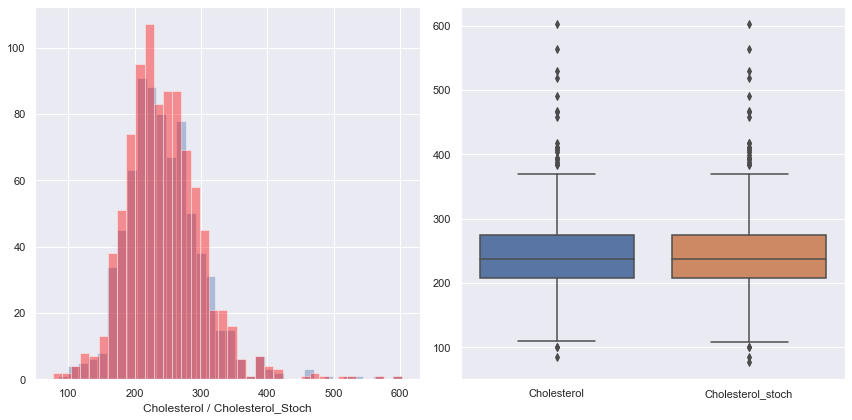

In [33]:
# compare values generated by random imputation and stochastic regression imputation 
# by plotting histograms and boxplots

sns.set()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 6)

sns.distplot(df_converted['Cholesterola'].dropna(), kde = False, ax = axes[0])
sns.distplot(df_converted['Cholesterol_stoch'], kde = False, color = 'red', ax = axes[0])
axes[0].set(xlabel = 'Cholesterol' + " / " + 'Cholesterol_Stoch')
    
sns.boxplot(data = pd.concat([df_converted['Cholesterol'], df_converted['Cholesterol_stoch']], axis = 1),
ax = axes[1])
    
plt.tight_layout()

We can, now, drop Cholesterol and Cholesterol_imp columns because we don't need them anymore.

In [35]:
# Drop Cholesterol and Cholesterol_imp columns.

df_converted_copy = df_converted
df_converted.drop(['Cholesterol', 'Cholesterol_imp'], axis = 1, inplace=True)

In [36]:
# Take a final look at the descriptive statistics of the dataset.

df_converted.describe()

,Age,RestingBP,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Cholesterol_stoch
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,136.789531,0.886696,0.552890,0.789531,0.188659,0.220284,0.050164,0.233370,0.600872,0.194111,0.404580,0.500545,0.430752,244.066383
std,9.437636,17.999749,25.467129,1.066960,0.497466,0.407864,0.391451,0.414664,0.218401,0.423206,0.489986,0.395731,0.491078,0.500273,0.495452,58.444792
min,28.000000,80.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.660298
25%,47.000000,120.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.000000
50%,54.000000,130.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,238.000000
75%,60.000000,140.000000,156.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,275.045448
max,77.000000,200.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,603.000000


I know there are outliers in this dataset, but there are only a few. So, I'll ignore them for now.

To summarize the actions we took in this part, we created a subset of the data with zero cholesterol values. The pivot table for missing cholesterol values suggested the majority of the subjects had heart disease. We decided to impute zero values instead of removing them from the dataset. Instead of replacing all values with a single value, we used **stochastic regression imputation**. Because replacing missing values with a single value introduce a bias to the dataset which reduces the accuracy of the model. On the other hand, stochastic regression imputation help us preserve the original distribution of the given feature as much as we can. We could also use the **regression imputation**. However, the regression imputation is deterministic. It means the predictions lie on the regression line. Therefore, the regression imputation also introduce some bias to the model compared to the stochastic regression imputation. With these changes, the average cholesterol for subjects with and without heart disease have changed:

In [37]:
print('The Average Cholesterol of Healthy Subjects:',df_converted.Cholesterol_stoch[df['HeartDisease'] == 0].mean())
print('The Average Cholesterol of Unhealthy Subjects:',df_converted.Cholesterol_stoch[df['HeartDisease'] == 1].mean())

The Average Cholesterol of Healthy Subjects: 239.20974473280617
The Average Cholesterol of Unhealthy Subjects: 247.99384183679328


### Scale the data

The numeric features are all non-normally distributed according to the Shapiro-Wilk test. However, only 'Cholesterol' and 'Oldpeak' are significantly skewed. Excluding outliers can reduce skewness but can also reduce accuracy of the model since we will be removing data by removing outliers. Considering the extremely skewed data, I'll, first, try a 'Min-Max Scaling' on the data. We can, then, compare results with models trained with a standardized dataset.

In [41]:
print('Skewness of the Cholesterol distribution:',df_converted.Cholesterol_stoch.skew())
print('Skewness of the Oldpeak distribution:',df_converted.Oldpeak.skew())

Skewness of the Cholesterol distribution: 1.065515049415044
Skewness of the Oldpeak distribution: 1.024544634289045


In [42]:
# Separate features set and the target set.

X = df_converted.drop('HeartDisease', axis=1)
y = df_converted.HeartDisease

In [44]:
X.head()

,Age,RestingBP,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Cholesterol_stoch
0,40,140.0,172,0.0,1,1,0,0,0,1,0,0,0,1,289.0
1,49,160.0,156,1.0,0,0,1,0,0,1,0,0,1,0,180.0
2,37,130.0,98,0.0,1,1,0,0,0,0,1,0,0,1,283.0
3,48,138.0,108,1.5,0,0,0,0,0,1,0,1,1,0,214.0
4,54,150.0,122,0.0,1,0,1,0,0,1,0,0,0,1,195.0


In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Part 6. Model Building

In [106]:
# import packages to be used for model building

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [107]:
# Use Naive Bayes as a baseline

gnb = GaussianNB()
cv = cross_val_score(gnb,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Gaussian Naive Bayes Classifier is {0}'.format(cv.mean()))

Cross validation score for the Gaussian Naive Bayes Classifier is 0.8471094123268037


In [108]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Logistic Regression Classifier is {0}'.format(cv.mean()))

Cross validation score for the Logistic Regression Classifier is 0.8438724319159101


In [109]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Decision Tree Classifier is {0}'.format(cv.mean()))

Cross validation score for the Decision Tree Classifier is 0.7620162446249402


In [110]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the K-Nearest Neighbors Classifier is {0}'.format(cv.mean()))

Cross validation score for the K-Nearest Neighbors Classifier is 0.8405996177735309


In [111]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Random Forest Classifier is {0}'.format(cv.mean()))

Cross validation score for the Random Forest Classifier is 0.84162685140946


In [112]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Support Vector Classifier is {0}'.format(cv.mean()))

Cross validation score for the Support Vector Classifier is 0.8339823220258002


In [113]:
abc = AdaBoostClassifier()
cv = cross_val_score(abc,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Adaboost Classifier is {0}'.format(cv.mean()))

Cross validation score for the Adaboost Classifier is 0.832990922121357


### With Standard Scaler

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [115]:
# Use Naive Bayes as a baseline
gnb = GaussianNB()
cv = cross_val_score(gnb,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Gaussian Naive Bayes Classifier is {0}'.format(cv.mean()))

Cross validation score for the Gaussian Naive Bayes Classifier is 0.8471094123268037


In [116]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Logistic Regression Classifier is {0}'.format(cv.mean()))

Cross validation score for the Logistic Regression Classifier is 0.8427615862398472


In [118]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Decision Tree Classifier is {0}'.format(cv.mean()))

Cross validation score for the Decision Tree Classifier is 0.7554586717630196


In [119]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the K-Nearest Neighbors Classifier is {0}'.format(cv.mean()))

Cross validation score for the K-Nearest Neighbors Classifier is 0.8548375537505972


In [120]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Random Forest Classifier is {0}'.format(cv.mean()))

Cross validation score for the Random Forest Classifier is 0.840539894887721


In [121]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Support Vector Classifier is {0}'.format(cv.mean()))

Cross validation score for the Support Vector Classifier is 0.8449354992833253


In [122]:
abc = AdaBoostClassifier(random_state=1)
cv = cross_val_score(abc,X_scaled,y,cv=10)
# print(cv)
print('Cross validation score for the Adaboost Classifier is {0}'.format(cv.mean()))

Cross validation score for the Adaboost Classifier is 0.832990922121357


### Model Tuned Performance with Standardized Dataset

In [124]:
# Load packages for optimization

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [125]:
# Simple performance reporting function

def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [126]:
# Optimize logistic regression classifier

lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_scaled,y)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Logistic Regression
Best Score: 0.8493191591017679
Best Parameters: {'C': 0.012742749857031334, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [127]:
# Optimize K-nearest Neighbors Classifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_scaled,y)
clf_performance(best_clf_knn,'KNN')

Fitting 10 folds for each of 48 candidates, totalling 480 fits
KNN
Best Score: 0.8548375537505972
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [128]:
# Optimize Support Vector Classifier

svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_scaled,y)
clf_performance(best_clf_svc,'SVC')

Fitting 10 folds for each of 55 candidates, totalling 550 fits
SVC
Best Score: 0.8482680363115145
Best Parameters: {'C': 1, 'degree': 3, 'kernel': 'poly'}


In [129]:
# Optimize Random Forest Classifier

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_scaled,y)
clf_performance(best_clf_rf,'Random Forest')

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Random Forest
Best Score: 0.850370281892021
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [130]:
# Optimize Adaboost Classifier

abc = AdaBoostClassifier()
param_grid =  {'n_estimators': [50,100,200,300],
               'learning_rate':[0.01,0.1,0.5,1],
                'algorithm': ['SAMME','SAMME.R']}
clf_abc = GridSearchCV(abc, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_rf = clf_abc.fit(X_scaled,y)
clf_performance(best_clf_rf,'AdaBoost')

Fitting 10 folds for each of 32 candidates, totalling 320 fits
AdaBoost
Best Score: 0.8482083134257048
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


## Part 7. Conclusion



In this notebook, I used kaggle api to search kaggle public datasets and chose the "heart failure" dataset to work on. I built several machine learning models to predict whether a subject has a heart failure or not based on various features, such as cholesterol, fasting blood pressure, age, sex, etc...

I started with the exploratory analysis. In the exploratory analysis part, I look at whether there are missing data, the descriptive statistics of each feature, distribution of numeric features using histograms and pivot tables, and distribution of categorical variables using barplots and pivot tables. Although there were no 'missing values', cholesterol and resting blood pressure features had zeros which doesn't make sense in reality. So, I replaced zeros in these features with NaNs. Finally I removed the row with zero resting blood pressure because there were only one.

I haven't done any feature engineering in this project because features were clean. In addition, this is a dataset involving medical features which are calibrated measurements and are already boiled down to mean something specific alone. 

In the data preprocessing part, I looked at the the subset of the data which had only the rows with zero cholesterol values. Interestingly, most of the patients in this subset had heart disease (around 80%). So, I decided that I should use a more sophisticated imputatuon method to introduce relatively less bias to the data. Therefore, I decided to use the **stochastic regression imputation**. To do that, I first replaced zeros in the cholesterol feature with random values from the existing values in each feature. Then, I built a regression model with noise to predict missing cholesterol values. 

In the model building part, I built several machine learning models using both normalized and standardized data. There wasn't a significant difference between the cross correlation scores of models built with normalized and standardized data. With that, K-Nearest Neighbor (KNN) classifier built using the stardardized data performed the best (cross validation score of 0.858). Then, I optimized all models except the baseline model (Gaussian Naive Bayes classifier) using the gridsearch technique. I was able to optimize some models slightly but there was no big performance improvements. After the optimization stage, KNN classifier still had the best cross-validation score (0.858). So, KNN classifier is the winner.

In this project, two notebooks helped me to plan the project and write the code. I drop the links below if you want to check them out. 

Thanks for reading! Have fun building machine learning models!

https://www.kaggle.com/kenjee/titanic-project-example
https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression